<a href="https://colab.research.google.com/github/khushboo28sahu/Computer-Vision/blob/main/MashroomClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors, preprocessing
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [ ]:
col = ['class','cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']

In [ ]:
ShroomDF = pd.read_csv('agaricus-lepiota.data', names = col, na_values= '?')

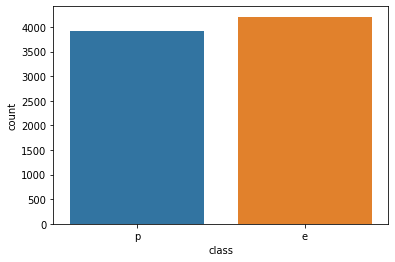

In [ ]:
ax = sns.countplot(x=ShroomDF['class'], data=ShroomDF)

In [ ]:
ShroomDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises?                    8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  5644 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [ ]:
ShroomDF.describe()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
ShroomDF['stalk-root'].values.any()

'e'

In [ ]:
ShroomDF.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises?                       0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

# Classification w/ dropped 'stalk-root'

In [ ]:
DFwoStkRt = ShroomDF.drop(['stalk-root'], axis=1)

In [ ]:
DFwoStkRt.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
DFwoStkRt.describe()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
DFwoStkRt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises?                    8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number                 8124 non-null object
ring-type  

In [ ]:
X = DFwoStkRt.drop(['class'], axis=1)
Y = DFwoStkRt['class']

In [ ]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
Y.describe()

count     8124
unique       2
top          e
freq      4208
Name: class, dtype: object

In [ ]:
Y.count()

8124

In [ ]:
#Y = Y.map({'p':0, 'e':1})

In [ ]:
Y.describe()

count     8124
unique       2
top          e
freq      4208
Name: class, dtype: object

In [ ]:
Y.head(10)

0    p
1    e
2    e
3    p
4    e
5    e
6    e
7    e
8    p
9    e
Name: class, dtype: object

In [ ]:
# data.Gender[data.Gender == 'male'] = 1
# data.Gender[data.Gender == 'female'] = 2

# gender = {'male': 1,'female': 2} 
# cls = {'p':0, 'e':1}

# Y = [[item] for item in data.Gender] 

In [ ]:
X = pd.get_dummies(X)
Y = pd.get_dummies(Y)

In [ ]:
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
Y.head()

,e,p
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [ ]:
# split data into training and testing sections
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [ ]:
# decision_tree = DecisionTreeClassifier() 
# decision_tree.fit(X_train, Y_train)
# Y_pred = decision_tree.predict(X_test)
# acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

## Training and Prediction

In [ ]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

#
# : train the classifier on the training data / labels:
#
model.fit(X_train, Y_train)

# : score the classifier on the testing data / labels:
score = model.score(X_test, Y_test)

In [ ]:
predictions = model.predict(X_test)

## Evaluating our model’s performance
Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
CM = confusion_matrix(Y_test.values.argmax(axis=1),predictions.argmax(axis=1))
print(CM)
#print(confusion_matrix(Y_test.values.argmax(axis=1),predictions.argmax(axis=1)))

[[857   0]
 [  0 768]]


In [ ]:
CM.shape

(2, 2)

In [ ]:
# FP = CM.sum(axis=0) - np.diag(CM)  
# FN = CM.sum(axis=1) - np.diag(CM)
# TP = np.diag(CM)
# TN = CM.values.sum() - (FP + FN + TP)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print('Sensitivity:',TPR)

# Specificity or true negative rate
TNR = TN/(TN+FP) 
print('Specificity', TNR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print('Precision',PPV)

# Negative predictive value
NPV = TN/(TN+FN)
print('Negative predictive value', NPV)

# Fall out or false positive rate
FPR = FP/(FP+TN)
print('false positive rate', FPR)

# False negative rate
FNR = FN/(TP+FN)
print('False negative rate', FNR)

# False discovery rate
FDR = FP/(TP+FP)
print('False discovery rate', FDR)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('Overall accuracy', ACC)



Sensitivity: 1.0
Specificity 1.0
Precision 1.0
Negative predictive value 1.0
false positive rate 0.0
False negative rate 0.0
False discovery rate 0.0
Overall accuracy 1.0


## Classification Report

In [ ]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       857
           1       1.00      1.00      1.00       768

   micro avg       1.00      1.00      1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 samples avg       1.00      1.00      1.00      1625



## Conclusion